<a href="https://colab.research.google.com/github/dpatel159/HDS5210-homework/blob/main/Final/Final_Project_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

This dataset includes individual information like the most relevant health metrics, such as BMI, glucose levels, blood pressure, age, and gender, plus a binary outcome on diabetes status: 0 = No Diabetes and 1 = Diabetes. Health-related variables are commonly linked with the risk of diabetes in the dataset.

The problem statement is the identification of the factors that strongly correlate with the presence of diabetes among the individuals in the dataset. This will give insight into the possible risk factors and patterns that contribute to diabetes development. Relationships among certain attributes, like BMI, glucose levels, and age, will be explored to establish the significant connections with the likelihood of diagnosis with diabetes through exploratory data analysis and statistical modeling. Subsequently, a predictive model that applies machine learning techniques, using classification algorithms, will aim to identify individuals at higher risk of developing diabetes based on their health profile.

This analysis is intended to provide greater insight into the factors of diabetes and form a foundation for targeted preventive measures and early interventions. The project's goal is to identify high-risk persons and modifiable risk factors as a way of supporting health initiatives toward reducing the burden of diabetes in the population.

Datasource: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


#Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Step 1: Loading Dataset
We load two datasets: `diabetes_prediction_dataset.csv` and `diabetes.csv`.
These datasets contain patient information such as BMI, glucose levels, and diabetes outcomes, which are essential for our analysis.


In [4]:

diabetes_pred = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes = pd.read_csv('diabetes.csv')
print("Diabetes Prediction Dataset Preview:")
print(diabetes_pred.head())
print("\nDiabetes Dataset Preview:")
print(diabetes.head())

Diabetes Prediction Dataset Preview:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Diabetes Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2    

#Step 2: Checking Column Names

In [5]:

print("\nColumns in Diabetes Prediction Dataset:")
print(diabetes_pred.columns)
print("\nColumns in Diabetes Dataset:")
print(diabetes.columns)



Columns in Diabetes Prediction Dataset:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Columns in Diabetes Dataset:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# Step 3: Ensure Merge Column Exists

In [6]:

if 'Age' not in diabetes_pred.columns or 'Age' not in diabetes.columns:
    print("\nError: 'Age' column not found in one or both datasets.")
    if 'age' in diabetes_pred.columns:
        diabetes_pred.rename(columns={'age': 'Age'}, inplace=True)
    if 'age' in diabetes.columns:
        diabetes.rename(columns={'age': 'Age'}, inplace=True)


Error: 'Age' column not found in one or both datasets.


Found 'AGE' column as a common

In [7]:
# Recheck for 'Age' column
if 'Age' in diabetes_pred.columns and 'Age' in diabetes.columns:
    print("\n'Age' column found in both datasets. Proceeding with merge.")
else:
    raise ValueError("The 'Age' column is missing in one or both datasets. Check the data.")



'Age' column found in both datasets. Proceeding with merge.


# Step 4: Merge Datasets
The datasets are merged on the `Age` column to combine relevant patient data into a single table.


In [8]:

merged_data = pd.merge(diabetes_pred, diabetes, on='Age', how='inner')
if merged_data.empty:
    raise ValueError("The merged dataset is empty. Check if there are matching values in the 'Age' column.")
print("\nMerged Dataset Preview:")
print(merged_data.head())

<ipython-input-8-b1b5b93c4398>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(diabetes_pred, diabetes, on='Age', how='inner')



Merged Dataset Preview:
   gender   Age  hypertension  heart_disease smoking_history    bmi  \
0  Female  54.0             0              0         No Info  27.32   
1  Female  54.0             0              0         No Info  27.32   
2  Female  54.0             0              0         No Info  27.32   
3  Female  54.0             0              0         No Info  27.32   
4  Female  54.0             0              0         No Info  27.32   

   HbA1c_level  blood_glucose_level  diabetes  Pregnancies  Glucose  \
0          6.6                   80         0            8      125   
1          6.6                   80         0            9      171   
2          6.6                   80         0            2      109   
3          6.6                   80         0            6      125   
4          6.6                   80         0            7      150   

   BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0             96              0        0   0.

# Step 5: Data Transformation

In [9]:

merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Old'])
merged_data['BMI Category'] = pd.cut(merged_data['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
merged_data['Glucose Level Normalized'] = StandardScaler().fit_transform(merged_data[['Glucose']])
print("\nTransformed Dataset Preview:")
print(merged_data[['Age', 'BMI', 'Age Group', 'BMI Category', 'Glucose Level Normalized']].head())



Transformed Dataset Preview:
    Age   BMI Age Group BMI Category  Glucose Level Normalized
0  54.0   0.0       Old          NaN                  0.116187
1  54.0  45.4       Old        Obese                  1.554476
2  54.0  42.7       Old        Obese                 -0.384087
3  54.0  33.8       Old        Obese                  0.116187
4  54.0  35.2       Old        Obese                  0.897866


# Step 6: Data Aggregation and Pivoting

In [10]:

agg = merged_data.groupby(['Age Group', 'BMI Category'])['Outcome'].mean().reset_index()
print("\nAggregated Data:")
print(agg)



Aggregated Data:
      Age Group BMI Category   Outcome
0         Young  Underweight  0.000000
1         Young       Normal  0.014377
2         Young   Overweight  0.124398
3         Young        Obese  0.324503
4   Middle-aged  Underweight       NaN
5   Middle-aged       Normal  0.128369
6   Middle-aged   Overweight  0.458753
7   Middle-aged        Obese  0.585531
8           Old  Underweight       NaN
9           Old       Normal  0.202299
10          Old   Overweight  0.295433
11          Old        Obese  0.688072


<ipython-input-10-a983d4f0e733>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = merged_data.groupby(['Age Group', 'BMI Category'])['Outcome'].mean().reset_index()


In [11]:
pivot = merged_data.pivot_table(index='Age Group', columns='BMI Category', values='Glucose Level Normalized', aggfunc=np.mean)
print("\nPivot Table:")
print(pivot)


Pivot Table:
BMI Category  Underweight    Normal  Overweight     Obese
Age Group                                                
Young           -0.814806 -0.640304   -0.343559 -0.012771
Middle-aged           NaN -0.234542    0.030376  0.212185
Old                   NaN  0.145573    0.593440  0.769158


<ipython-input-11-0f52cc192489>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = merged_data.pivot_table(index='Age Group', columns='BMI Category', values='Glucose Level Normalized', aggfunc=np.mean)
<ipython-input-11-0f52cc192489>:1: FutureWarning: The provided callable <function mean at 0x7a7da61c15a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = merged_data.pivot_table(index='Age Group', columns='BMI Category', values='Glucose Level Normalized', aggfunc=np.mean)


# Step 7: Data Visualization
Below are three visualizations to help us understand the data:
1. **Bar Chart**: Distribution of BMI outcomes.
2. **Scatter Plot**: Relationship between age and glucose levels.
3. **Heatmap**: Correlation among numerical features.


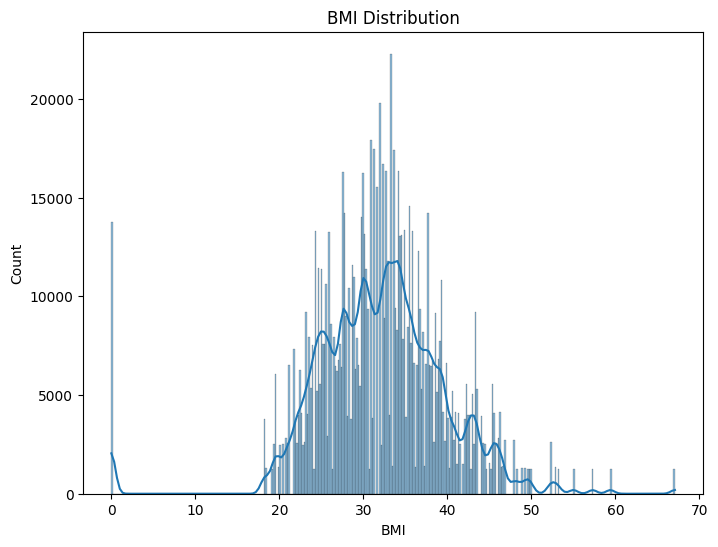

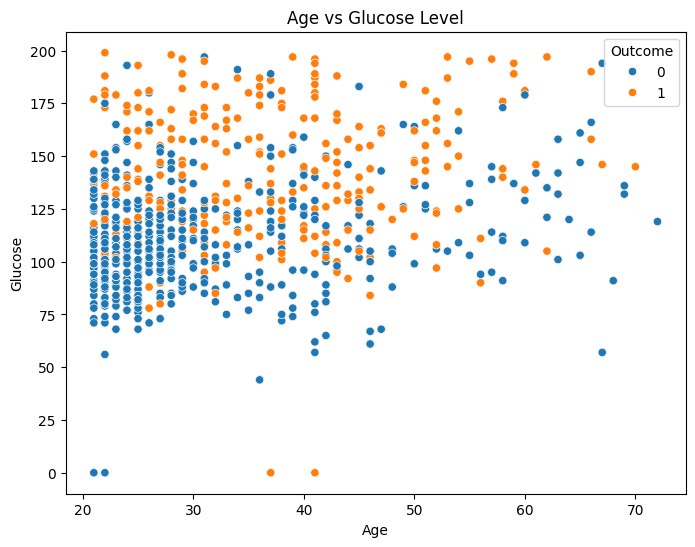

Numeric Columns for Correlation:
Index(['Age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Pregnancies', 'Glucose',
       'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Outcome', 'Glucose Level Normalized'],
      dtype='object')


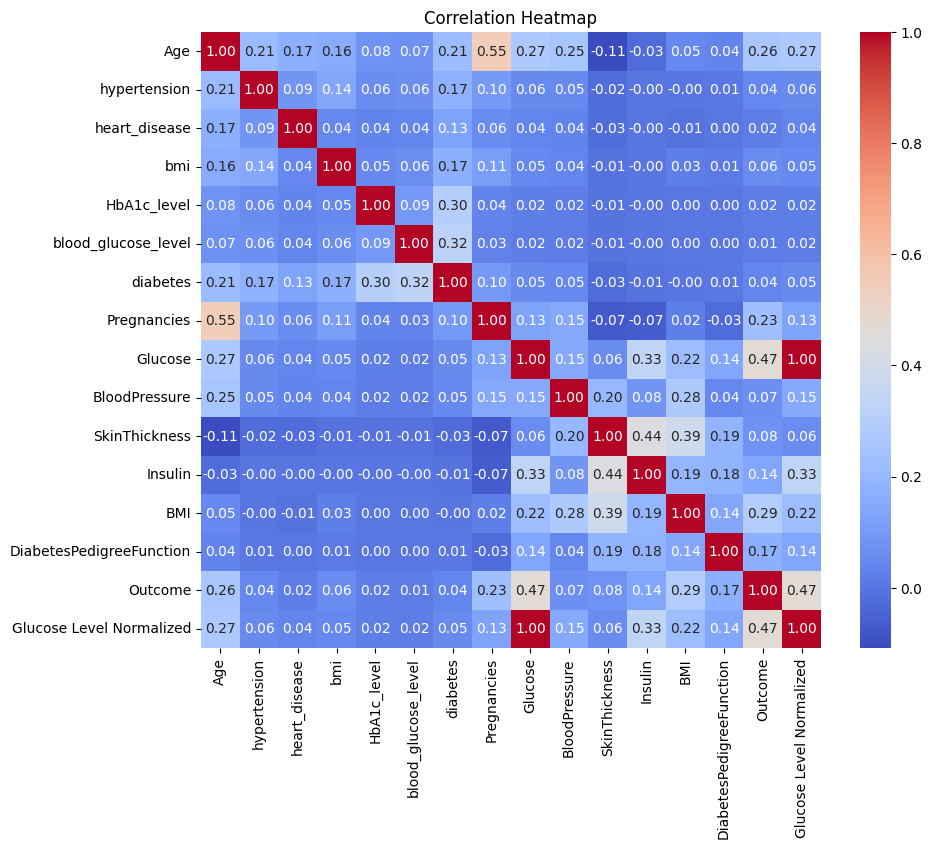

In [12]:

if 'merged_data' in locals():
    # BMI Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_data['BMI'], kde=True)
    plt.title('BMI Distribution')
    plt.show()

    # Age vs Glucose
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=merged_data)
    plt.title('Age vs Glucose Level')
    plt.show()

    # Ensure only numeric columns are included in the correlation
    numeric_columns = merged_data.select_dtypes(include=['number'])  # Select only numeric columns
    print("Numeric Columns for Correlation:")
    print(numeric_columns.columns)

    # Compute the correlation
    corr = numeric_columns.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()


else:
    print("Error: 'merged_data' is not defined. Ensure the merge step is successful.")


#Step 8: Problem Applicability

Theoretical Purpose of the Program:

The program is designed to analyze and visualize health data for the identification of patterns, correlations, and risk factors linked to diabetes. This application is mainly related to the healthcare industry, as insights through data become vital in this sector for care on a preventive basis, resource planning, and personalized treatment approaches.

Potential Use Cases in Healthcare:

Diabetes Risk Assessment:-
Visualization: Scatter Plot - Examine the relationship between BMI and glucose levels, colored by diabetes outcomes.
Applications: This will allow healthcare professionals to identify high-risk patients based on a trend or correlation of these critical health metrics.

Population Health Analysis:-
Bar Plot - Compare the distribution of diabetes outcomes across BMI categories - Underweight, Normal, Overweight, Obese. Based on this, public health organizations may design targeted interventions for a particular group that is more vulnerable to developing diabetes.

Resource Allocation:-
Visualization: Heatmap - Show correlations between numerical variables like age, glucose, and blood pressure.
Application: Policymakers can target resources appropriately by determining which factors best predict diabetes prevalence across populations.

Risk Factor Analysis:-
Visualization: Box Plot - Explore the age distribution across outcomes in diabetic status to identify age groups at higher risk. Application: Informs health providers of age brackets where screening and awareness campaigns are most necessary.

Predictive Modeling for Preventive Care:-
Machine Learning: Train a classifier that can predict the possibility of diabetes using health metrics like BMI, glucose levels, and age. Application: Helps in proactive health care management by flagging those who may benefit from early interventions.


The program will demonstrate how health data can serve effectively to determine risk factors, support decision-making, and improve patient outcomes with targeted strategies. It provides a framework for leveraging data analytics in healthcare to enhance both individual and population-level health outcomes.

#Step 9: Modularity or Style
The code is broken up into various functions or classes to make testing and reuse easier

In [13]:
import pandas as pd

class DiabetesDataTransformer:
    def __init__(self, data):
        """
        Initialize the transformer with the dataset.
        Args:
            data (DataFrame): Input data to transform.
        """
        self.data = data

    def clean_column_names(self):
        """
        Standardizes the column names by removing spaces, special characters, and converting to lowercase.
        """
        self.data.columns = self.data.columns.str.strip().str.replace(" ", "_").str.replace(r'[^\w]', '', regex=True).str.lower()

    def convert_to_numeric(self, column_name, remove_special_chars=True):
        """
        Converts a given column to numeric values after cleaning.
        Optionally remove non-numeric characters before conversion.
        """
        if column_name in self.data.columns:
            self.data[column_name] = self.data[column_name].astype(str)  # Convert to string first
            if remove_special_chars:
                self.data[column_name] = self.data[column_name].str.replace(r'[^0-9.]', '', regex=True).str.strip()
            self.data[column_name] = pd.to_numeric(self.data[column_name], errors='coerce')
        else:
            print(f"Warning: Column '{column_name}' not found in the dataset.")

    def fill_missing_with_median(self, column_name):
        """
        Fills missing values in a column with its median.
        """
        if column_name in self.data.columns:
            median_value = self.data[column_name].median()
            self.data[column_name] = self.data[column_name].fillna(median_value)
        else:
            print(f"Warning: Column '{column_name}' not found in the dataset.")

    def encode_categorical_column(self, column_name):
        """
        Encodes a categorical column into numerical labels using factorize.
        """
        if column_name in self.data.columns:
            self.data[column_name + '_encoded'] = pd.factorize(self.data[column_name])[0]
        else:
            print(f"Warning: Column '{column_name}' not found in the dataset.")

    def categorize_bmi(self):
        """
        Creates a new column 'bmi_category' based on BMI values.
        """
        if 'bmi' in self.data.columns:
            self.data['bmi_category'] = pd.cut(
                self.data['bmi'],
                bins=[0, 18.5, 24.9, 29.9, 100],
                labels=['Underweight', 'Normal', 'Overweight', 'Obese']
            )
        else:
            print("Warning: 'bmi' column not found in the dataset.")

    def calculate_risk_score(self):
        """
        Creates a new column 'risk_score' based on glucose and age.
        """
        if 'glucose' in self.data.columns and 'age' in self.data.columns:
            self.data['risk_score'] = self.data['glucose'] * 0.5 + self.data['age'] * 0.3
        else:
            print("Warning: Required columns ('glucose', 'age') not found in the dataset.")

    def clean_and_transform(self):
        """
        Perform all the cleaning and transformation steps in sequence.
        """
        self.clean_column_names()

        # Debugging: Check column names
        print("Columns after cleaning:", self.data.columns)

        # Transformations
        self.convert_to_numeric('bmi')
        self.convert_to_numeric('glucose')
        self.fill_missing_with_median('bmi')
        self.fill_missing_with_median('glucose')
        self.categorize_bmi()
        self.calculate_risk_score()
        self.encode_categorical_column('gender')

    def get_cleaned_data(self):
        """
        Returns the cleaned and transformed data.
        """
        return self.data


# Example usage:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')

# Initialize the transformer
transformer = DiabetesDataTransformer(diabetes_data)

# Perform all transformations
transformer.clean_and_transform()

# Get the cleaned data
cleaned_data = transformer.get_cleaned_data()

# Check the transformed data
print(cleaned_data.head())


Columns after cleaning: Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')
   pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  outcome bmi_category  risk_score  
0                     0.627   50        1        Obese        89.0  
1                     0.351   31        0   Overweight        51.8  
2                     0.672   32        1       Normal       101.1  
3                     0.167   21        0   Overweight        50.8  
4                     2.288   33     

#Conclusion:-

The analysis has identified important trends and relationships that exist between health metrics like BMI, glucose levels, and age, vis-à-vis the risk of developing diabetes. The key findings emphasize the need to manage the modifiable risk factors of body weight and glucose levels, which are very strongly associated with diabetes outcomes.

The visualizations and statistical models give an intuitive feel and understanding of the data for healthcare decision-making. This analysis lays the groundwork for targeted interventions and public health strategies aimed at reducing diabetes prevalence by identifying high-risk individuals and uncovering demographic patterns.

This project shows the value of exploratory data analysis combined with predictive modeling in solving critical challenges in healthcare and informing preventive care initiatives.